## Multiple Linear Regression

In [1]:
# y = b0 + b1*x1 + b2*x2 + b3*x3 + ......... multiple linear regression

## Import library

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
plt.rcParams["figure.figsize"] = (10, 6)
import warnings
warnings.filterwarnings("ignore")

## Read Dataset

In [3]:
df = pd.read_csv("Advertising.csv")
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


## Data Preparation EDA

In [4]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


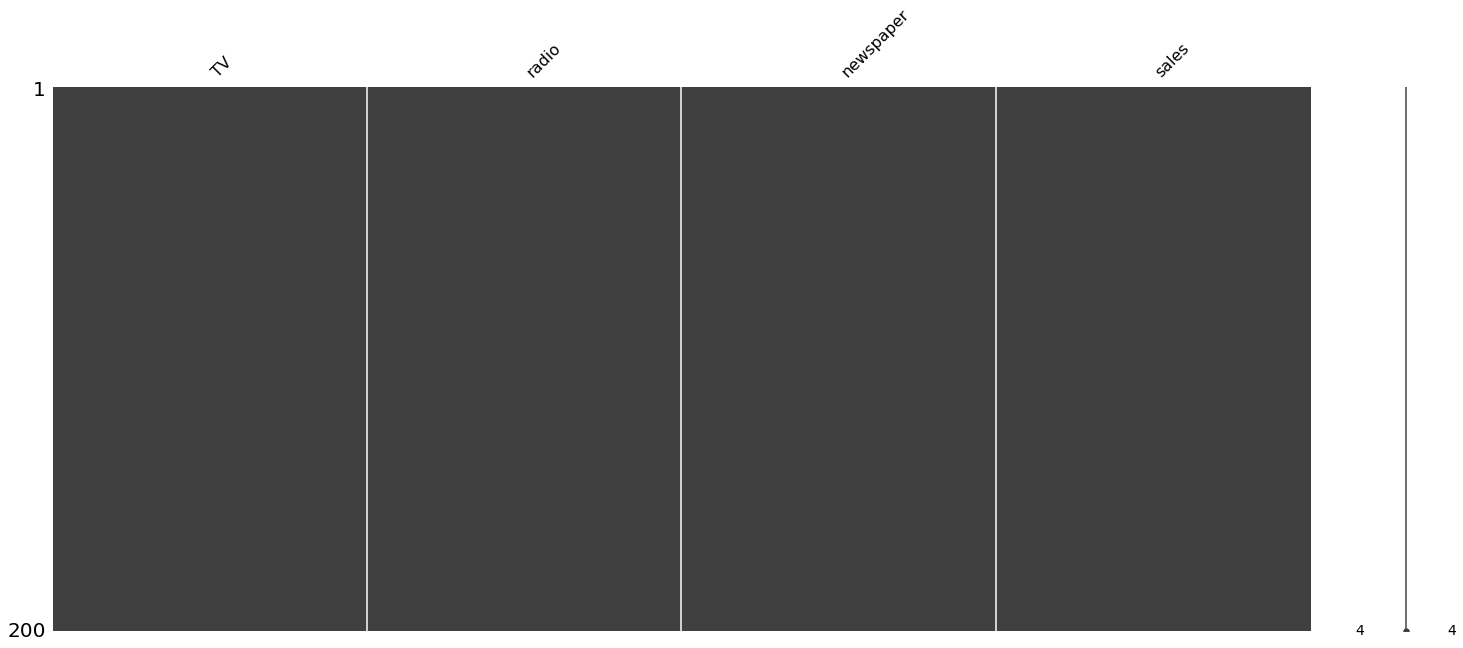

In [6]:
import missingno as msno

msno.matrix(df);

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [8]:
df.sort_values(by = "sales" , ascending = False)

,TV,radio,newspaper,sales
175,276.9,48.9,41.8,27.0
183,287.6,43.0,71.8,26.2
198,283.6,42.0,66.2,25.5
98,289.7,42.3,51.2,25.4
147,243.2,49.0,44.3,25.4
...,...,...,...,...
108,13.1,0.4,25.6,5.3
78,5.4,29.9,9.4,5.3
8,8.6,2.1,1.0,4.8
155,4.1,11.6,5.7,3.2


In [9]:
print(np.mean([100,110,120,115]))
print(np.std([100 , 110 , 120 , 115])) # std is low because values near.

111.25
7.39509972887452


In [10]:
print(np.mean([100,110,120,800]))
print(np.std([100 , 110 , 120 , 800])) # std is too much, near to mean. That means there may be an outlier.

282.5
298.8624265443885


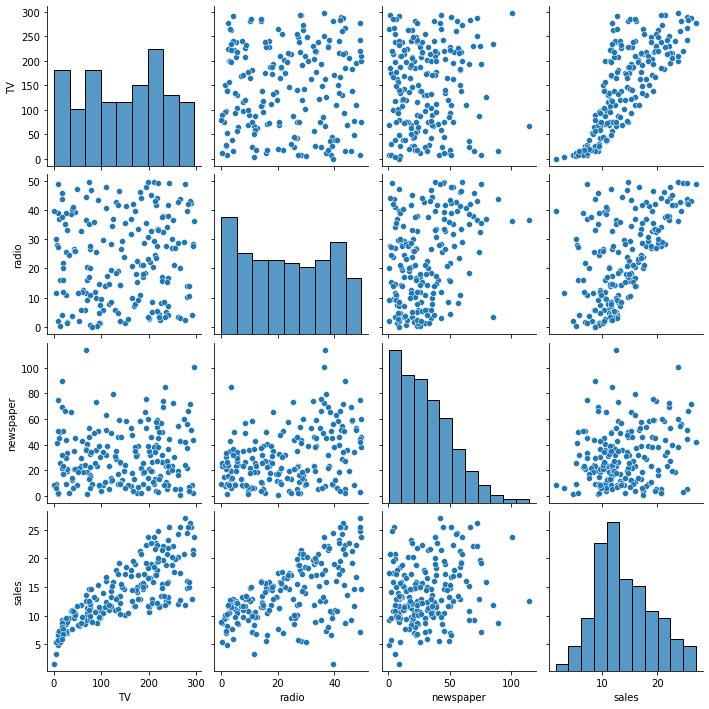

In [11]:
sns.pairplot(df);

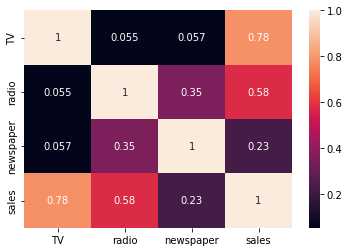

In [12]:
sns.heatmap(df.corr() , annot=True);

![](2022-09-10-18-58-56.png)

In [13]:
from scipy.stats import skew

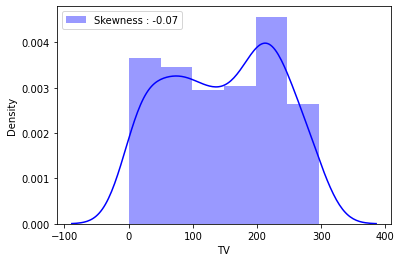

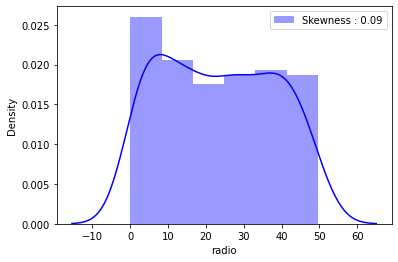

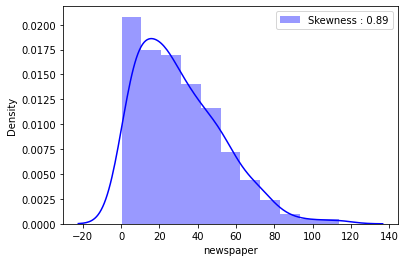

In [14]:
for j in df.drop(columns = "sales").columns:
    g = sns.distplot(df[j], color= "b", label= "Skewness : %.2f"%(df[j].skew()))
    g = g.legend(loc= "best")
    plt.show()

## Train - Test Split

In [15]:
# 1000 e kadar % 20/30 test , % 80/70 train
# 1000 ile 100000 satır arasında %10/20 test , %90/80 train
# 100000 ile 100000000 satır arasında %5 test , %95 train
# 100000000 üzeri satırlık datada %1 test , % 99 train

In [16]:
X = df.drop("sales" , axis = 1)
y = df["sales"]

print(X , y)

        TV  radio  newspaper
0    230.1   37.8       69.2
1     44.5   39.3       45.1
2     17.2   45.9       69.3
3    151.5   41.3       58.5
4    180.8   10.8       58.4
..     ...    ...        ...
195   38.2    3.7       13.8
196   94.2    4.9        8.1
197  177.0    9.3        6.4
198  283.6   42.0       66.2
199  232.1    8.6        8.7

[200 rows x 3 columns] 0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64


In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size = 0.3 , random_state = 42)

![](2022-09-10-19-39-43.png)

In [19]:
print("X Train features shape: {}\ny Train features shape: {}\nX Test features shape : {}\nY Test features shape : {}".format
      (X_train.shape, y_train.shape, X_test.shape, y_test.shape))

X Train features shape: (140, 3)
y Train features shape: (140,)
X Test features shape : (60, 3)
Y Test features shape : (60,)


In [20]:
X_train

,TV,radio,newspaper
169,284.3,10.6,6.4
97,184.9,21.0,22.0
31,112.9,17.4,38.6
12,23.8,35.1,65.9
35,290.7,4.1,8.5
...,...,...,...
106,25.0,11.0,29.7
14,204.1,32.9,46.0
92,217.7,33.5,59.0
179,165.6,10.0,17.6


In [21]:
y_train

169    15.0
97     15.5
31     11.9
12      9.2
35     12.8
       ... 
106     7.2
14     19.0
92     19.4
179    12.6
102    14.8
Name: sales, Length: 140, dtype: float64

## Model Fitting and Compare Actual and Predicted Labels

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
lr = LinearRegression()

In [24]:
lr.fit(X_train , y_train)

LinearRegression()

In [25]:
y_preds = lr.predict(X_test)
y_preds

array([16.5653963 , 21.18822792, 21.55107058, 10.88923816, 22.20231988,
       13.35556872, 21.19692502,  7.35028523, 13.27547079, 15.12449511,
        9.01443026,  6.52542825, 14.30205991,  8.97026042,  9.45679576,
       12.00454351,  8.91549403, 16.15619251, 10.29582883, 18.72473553,
       19.76821818, 13.77469028, 12.49638908, 21.53501762,  7.60860741,
        5.6119801 , 20.91759483, 11.80627665,  9.08076637,  8.51412012,
       12.17604891,  9.9691939 , 21.73008956, 12.77770578, 18.1011362 ,
       20.07590796, 14.26202556, 20.93826535, 10.83938827,  4.38190607,
        9.51332406, 12.40486324, 10.17045434,  8.09081363, 13.16388427,
        5.2243552 ,  9.28893833, 14.09330719,  8.69024497, 11.66119763,
       15.71848432, 11.63156862, 13.35360735, 11.1531472 ,  6.33636845,
        9.76157954,  9.4195714 , 24.25516546,  7.69519137, 12.15317572])

In [26]:
lr.coef_

array([0.04405928, 0.1992875 , 0.00688245])

In [27]:
lr.intercept_

2.7089490925159065

In [28]:
# np.polyfit(X, y , deg=3) # I'll look that.

## y_preds = b1 * TV + b2 * radio + b3 * newspaper + b0

In [29]:
# b1,b2,b3 = lr.coef_
# b0 = lr.intercept_
# y_preds = b0 + b1 * TV + b2 * radio + b3 * newspaper

In [30]:
sum(X_test.loc[95] * lr.coef_) + lr.intercept_ # Manual predicts for multiple linear regression. We predicted 95.index's y value.

16.565396297434837

In [31]:
my_dict = {'Actual ' : y_test , 'Preds' : y_preds , 'residual' : y_test - y_preds}
compare = pd.DataFrame(my_dict)
compare.head()

,Actual,Preds,residual
95,16.9,16.565396,0.334604
15,22.4,21.188228,1.211772
30,21.4,21.551071,-0.151071
158,7.3,10.889238,-3.589238
128,24.7,22.202320,2.497680


In [32]:
result_sample = compare.head(25)
result_sample

,Actual,Preds,residual
95,16.9,16.565396,0.334604
15,22.4,21.188228,1.211772
30,21.4,21.551071,-0.151071
158,7.3,10.889238,-3.589238
128,24.7,22.202320,2.497680
115,12.6,13.355569,-0.755569
69,22.3,21.196925,1.103075
170,8.4,7.350285,1.049715
174,11.5,13.275471,-1.775471
45,14.9,15.124495,-0.224495


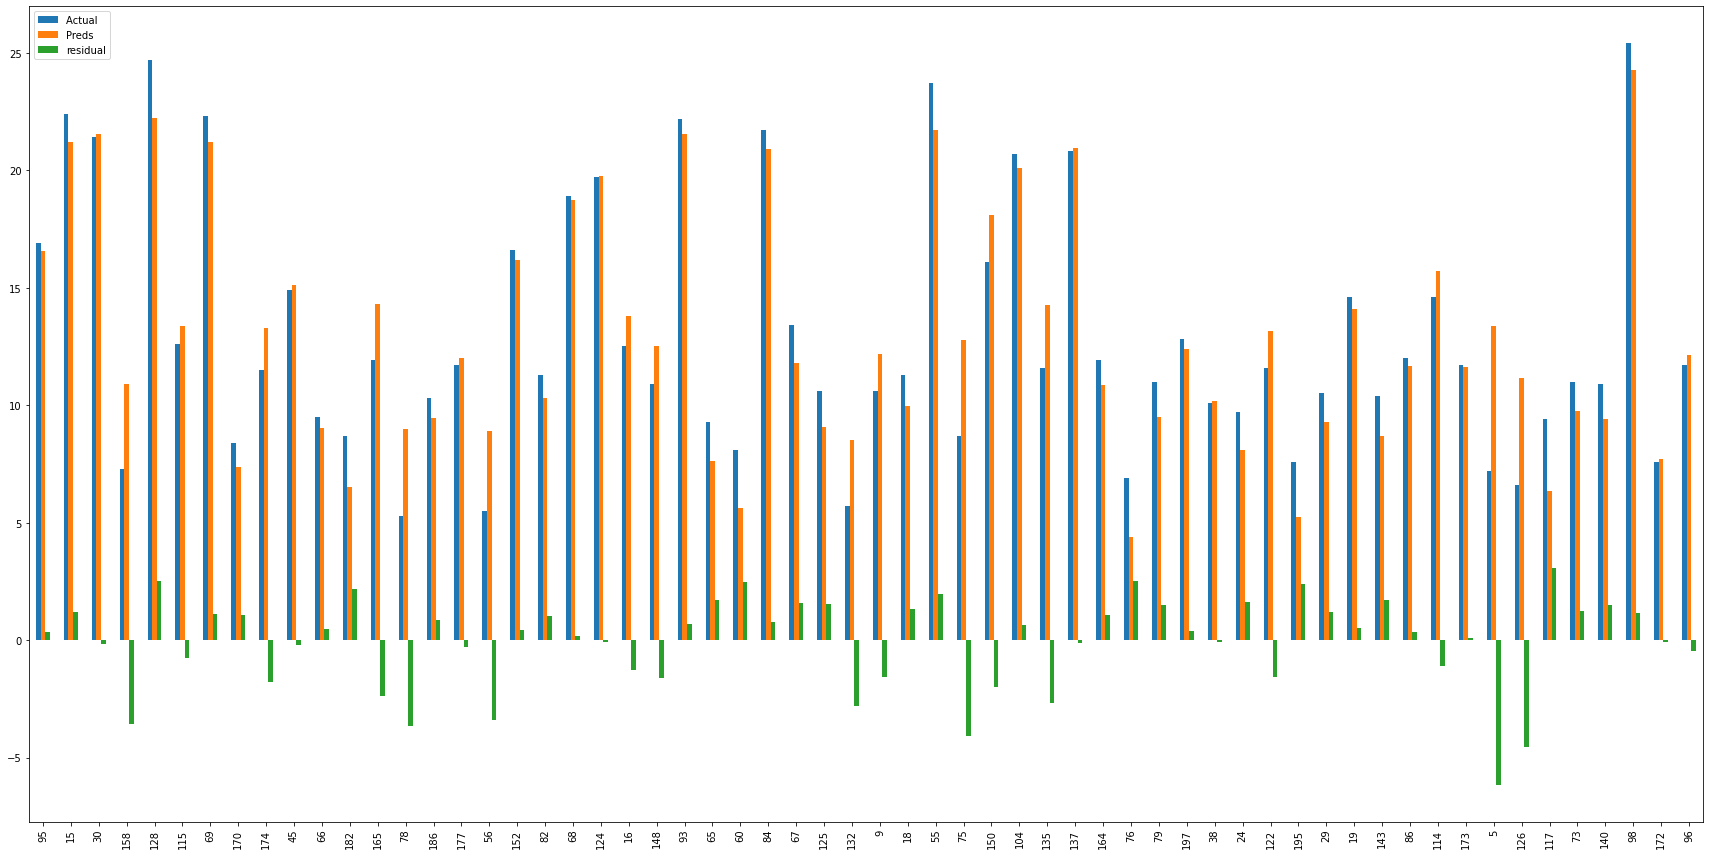

In [39]:
compare.plot(kind = "bar" , figsize = (30,15) );

In [43]:
print(compare[compare["residual"] > 0 ].count()[0])
print(compare[compare["residual"] < 0 ].count()[0])

35
25


## Error Metrics

In [44]:
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score

In [51]:
r2 = r2_score(y_test , y_preds)
mae = mean_absolute_error(y_test , y_preds)
mse = mean_squared_error(y_test , y_preds)
rmse = np.sqrt(mean_squared_error(y_test , y_preds))

In [52]:
print(f"""
      r2 score : {r2}
      mean absolute error : {mae}
      mean squared error : {mse}
      root mean squared error : {rmse}
      """)


      r2 score : 0.8609466508230368
      mean absolute error : 1.5116692224549086
      mean squared error : 3.79679723671522
      root mean squared error : 1.9485372043446387
      


In [ ]:
#

## What is the concept of punishment for RMSEA error metric?

In [53]:
variables = {"Actual": [1000, 2000, 3000, 4000, 5000], "pred": [1100, 2200, 3200, 4200, 5300]}
variables2 = {"Actual": [1000, 2000, 3000, 4000, 5000], "pred": [1100, 2200, 3200, 4200, 5800]} ## RMSE'nin hataları nasıl cezalandırdığını görmek için pred'in son değerini 5800 yaptım.

In [56]:
df_2 = pd.DataFrame(variables)
df_2

,Actual,pred
0,1000,1100
1,2000,2200
2,3000,3200
3,4000,4200
4,5000,5300


In [57]:
df_3 = pd.DataFrame(variables2)
df_3

,Actual,pred
0,1000,1100
1,2000,2200
2,3000,3200
3,4000,4200
4,5000,5800


In [58]:
df_2["residual"] = abs(df_2.Actual - df_2.pred)
df_2

,Actual,pred,residual
0,1000,1100,100
1,2000,2200,200
2,3000,3200,200
3,4000,4200,200
4,5000,5300,300


In [59]:
df_3["residual"] = abs(df_3.Actual - df_3.pred)
df_3

,Actual,pred,residual
0,1000,1100,100
1,2000,2200,200
2,3000,3200,200
3,4000,4200,200
4,5000,5800,800


In [60]:
sum(df_2["residual"]) / 5 # mae = 200

200.0

In [64]:
sum(df_3["residual"]) / 5 # mae = 200

300.0

In [62]:
np.sqrt(sum((df_2.Actual-df_2.pred)**2) / 5) # ma3 = 209

209.76176963403032

In [63]:
np.sqrt(sum((df_3.Actual-df_3.pred)**2) / 5) # rmse = 392

392.42833740697165

In [ ]:
# rmse punished more.

## Evaluation Model

## Is data suitable for linear regression?